In [54]:
# gym 라이브러리 임포트
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

# 환경 생성
register(
    id='FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name':'4x4',
           'is_slippery':False}
)


env = gym.make('FrozenLake-v3')



Error: Cannot re-register id: FrozenLake-v3

In [55]:
# 게임 시작
for i_episode in range(20):
    observation = env.reset()
    
    for t in range(100):
        # 필드 그리기
        env.render()
        
        # 무작위로 행동을 선택
        action = env.action_space.sample()

        # 1턴 진행
        observation, reward, done, info = env.step(action)
        print(observation, reward, done, info, action)

        # 종료
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break


SFFF
FHFH
FFFH
HFFG
4 0.0 False {'prob': 1.0} 1
  (Down)
SFFF
FHFH
FFFH
HFFG
5 0.0 True {'prob': 1.0} 2
Episode finished after 2 timesteps

SFFF
FHFH
FFFH
HFFG
0 0.0 False {'prob': 1.0} 0
  (Left)
SFFF
FHFH
FFFH
HFFG
0 0.0 False {'prob': 1.0} 0
  (Left)
SFFF
FHFH
FFFH
HFFG
1 0.0 False {'prob': 1.0} 2
  (Right)
SFFF
FHFH
FFFH
HFFG
5 0.0 True {'prob': 1.0} 1
Episode finished after 4 timesteps

SFFF
FHFH
FFFH
HFFG
1 0.0 False {'prob': 1.0} 2
  (Right)
SFFF
FHFH
FFFH
HFFG
5 0.0 True {'prob': 1.0} 1
Episode finished after 2 timesteps

SFFF
FHFH
FFFH
HFFG
1 0.0 False {'prob': 1.0} 2
  (Right)
SFFF
FHFH
FFFH
HFFG
2 0.0 False {'prob': 1.0} 2
  (Right)
SFFF
FHFH
FFFH
HFFG
1 0.0 False {'prob': 1.0} 0
  (Left)
SFFF
FHFH
FFFH
HFFG
5 0.0 True {'prob': 1.0} 1
Episode finished after 4 timesteps

SFFF
FHFH
FFFH
HFFG
1 0.0 False {'prob': 1.0} 2
  (Right)
SFFF
FHFH
FFFH
HFFG
0 0.0 False {'prob': 1.0} 0
  (Left)
SFFF
FHFH
FFFH
HFFG
1 0.0 False {'prob': 1.0} 2
  (Right)
SFFF
FHFH
FFFH
HFFG
1 0.0 False {'

In [56]:
# 환경변수 값의 가짓수
print(env.observation_space.n)
# 행동변수 값의 가짓수
print(env.action_space.n)

16
4


In [94]:
# Q Table을 모두 0으로 초기화 한다. : 2차원 (number of state, action space) = (16,4)
Q = np.zeros([env.observation_space.n, env.action_space.n])

# discount 정의 => 미래의 reward를 현재의 reward 보다 조금 낮게 본다.
dis = 0.99

# 몇 번 시도를 할 것인가 (에피소드)
num_episodes = 6000

# 에피소드마다 총 리워드의 합을 저장하는 리스트
rList = []

#-

for i in range(num_episodes) : 
    state = env.reset()
    rAll = 0
    done = False
    
    # Q learning 알고리즘
    while not done : 
        # Action 중에 가장 R(Reward)이 큰 Action을 고른다. 
        # 이 때, random noise 방식으로 decaying Exploit & Exploration 구현 
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i+1))
        
        # 해당 Action을 했을 때 environment가 변하고, 새로운 state, reward, done 여부를 반환 받음
        new_state, reward, done, _ = env.step(action)
        
        # Q = R + Q 
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)

#-

# for i in range(num_episodes) : 
#     state = env.reset()
#     rAll = 0
#     done = False
    
#     # exploration의 확률 (decaying)
#     e = 1./((i / 100) + 1)
    
#     # Q learning 알고리즘
#     while not done : 
        
#         # E-Greedy 알고리즘으로 action 고르기
#         if np.random.rand(1) < e :
#             action = env.action_space.sample()
#         else : 
#             action = np.argmax(Q[state, :])
        
#         # 해당 Action을 했을 때 environment가 변하고, 새로운 state, reward, done 여부를 반환 받음
#         new_state, reward, done, _ = env.step(action)
        
#         # Q = R + Q 
#         Q[state, action] = reward + dis * np.max(Q[new_state, :])
        
#         rAll += reward
#         state = new_state
        
#     rList.append(rAll)



Success rate : 0.85
Final Q-Table Values
[[0.94148015 0.95099005 0.95099005 0.94148015]
 [0.94148015 0.         0.96059601 0.95099005]
 [0.95099005 0.970299   0.95099005 0.96059601]
 [0.96059601 0.         0.95099005 0.95099005]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.96059601]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.970299   0.99       0.         0.970299  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]


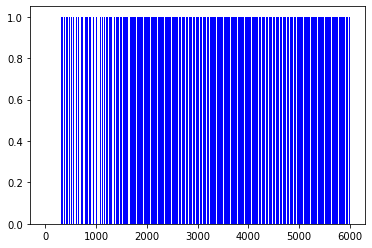

In [95]:
print("Success rate : "+str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)

plt.bar(range(len(rList)), rList, color="blue")
plt.show()